In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def generate_dataset_1(num_samples=40):
    np.random.seed(40)
    # Generate data
    x1 = np.random.uniform(-20, 20, num_samples)
    f_x = 100 * x1 + 1
    eps = np.random.randn(num_samples)
    y = f_x + eps
    return x1, y

In [3]:
def generate_dataset_2(num_samples=40):
    np.random.seed(45)
    # Generate data
    x1 = np.random.uniform(-1, 1, num_samples)
    f_x = 3 * x1 + 4
    eps = np.random.randn(num_samples)
    y = f_x + eps
    return x1, y

In [4]:
def f(x,y,X,Y):
  result=0.0
  for idx,i in enumerate(X):
    result=result+(Y[idx][0]-(x+y*X[idx][1]))**2
  return result/len(Y)
# def f(x, y):
#     return (14 + 3*x**2 +14*y**2 -12*x - 28*y + 12*x*y)/3

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.axes_grid1 import make_axes_locatable
import torch

def create_XYZ(f,X_,y_):
    # Generate data
    x = np.linspace(0,110, 100)
    y = np.linspace(0,110, 100)
    X, Y = np.meshgrid(x, y)

    # Convert to PyTorch tensors
    X_torch = torch.from_numpy(X)
    Y_torch = torch.from_numpy(Y)

    # Evaluate the function

    Z = f(X_torch, Y_torch,X_,y_)
    #Z = f(X_torch, Y_torch)
    return X, Y, Z, X_torch, Y_torch

def create_contour(X, Y, Z, ax2, alpha, scatter_pts=None, filled=True, levels=10, mark_levels=False):
    if filled:
        scatter_color='white'
        contour = ax2.contourf(X, Y, Z.detach().numpy(), levels=levels, cmap='magma', alpha=alpha)
    else:
        scatter_color='black'
        contour = ax2.contour(X, Y, Z.detach().numpy(), levels=levels, cmap='magma', alpha=alpha)
    if scatter_pts is not None:
        ax2.scatter(scatter_pts[0], scatter_pts[1], s=10, c=scatter_color)
    ax2.set_xlabel('x')
    ax2.set_ylabel('y')
    ax2.set_title('Contour Plot')


    # Add a colorbar in between the subplots
    divider = make_axes_locatable(ax2)
    cax = divider.append_axes("right", size="5%", pad=0.1)
    cbar = plt.colorbar(contour, cax=cax)
    return ax2, contour



In [6]:
def create_XYZ2(f,X_,y_):
    # Generate data
    x = np.linspace(-5,5,100)
    y = np.linspace(-5,5,100)
    X, Y = np.meshgrid(x, y)

    # Convert to PyTorch tensors
    X_torch = torch.from_numpy(X)
    Y_torch = torch.from_numpy(Y)

    # Evaluate the function

    Z = f(X_torch, Y_torch,X_,y_)
    #Z = f(X_torch, Y_torch)
    return X, Y, Z, X_torch, Y_torch

In [7]:
def f1(x, y,x1,y1):
    return (y1[0]-x-x1[1]*y)**2

def f2(x, y,x1,y1):
    return (y1[0]-x-x1[1]*y)**2

def f3(x, y,x1,y1):
    return (y1[0]-x-x1[1]*y)**2

In [8]:
def create_XYZ3(f,X_,y_):
    # Generate data
    x = np.linspace(-5,5,10)
    y = np.linspace(-5,5, 10)
    X, Y = np.meshgrid(x, y)

    # Convert to PyTorch tensors
    X_torch = torch.from_numpy(X)
    Y_torch = torch.from_numpy(Y)

    # Evaluate the function

    Z = f(X_torch, Y_torch,X_,y_)
    #Z = f(X_torch, Y_torch)
    return X, Y, Z, X_torch, Y_torch

tensor([[1157352.8408, 1157305.1458, 1157259.9200,  ..., 1164222.7240,
         1164414.5352, 1164608.8155],
        [1131779.7120, 1131732.5358, 1131687.8288,  ..., 1138699.9195,
         1138892.2495, 1139087.0486],
        [1106492.2837, 1106445.6263, 1106401.4381,  ..., 1113462.8155,
         1113655.6643, 1113850.9822],
        ...,
        [   6981.0314,    6983.6607,    6988.7592,  ...,   18732.3692,
           18974.5046,   19219.1093],
        [   9120.8544,    9124.0025,    9129.6197,  ...,   20922.5164,
           21165.1707,   21410.2941],
        [  11546.3779,   11550.0448,   11556.1808,  ...,   23398.3642,
           23641.5373,   23887.1795]], dtype=torch.float64)
Momentum Epoch 0, Loss: 1157352.840794627
[0.22018297] [115.72190583]
Momentum Epoch 20, Loss: 1160.782205865637
[0.58604616] [99.58328405]
Momentum Epoch 40, Loss: 1.8345190663325777
[0.80612206] [99.9745419]
Momentum Converged at epoch 59, Loss: 0.8743666340271584


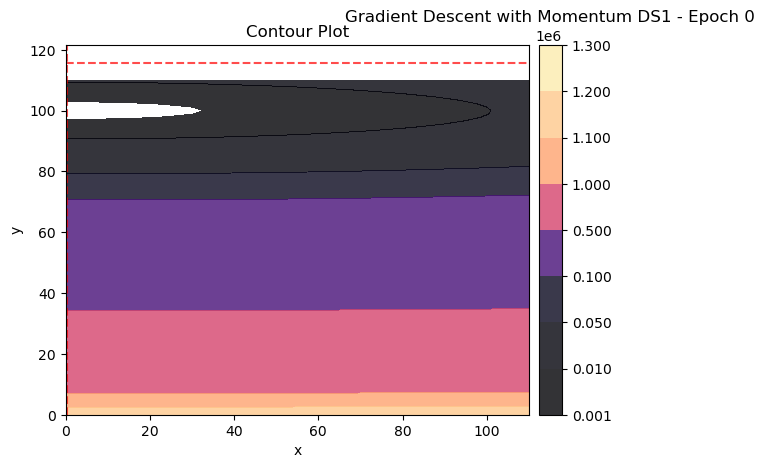

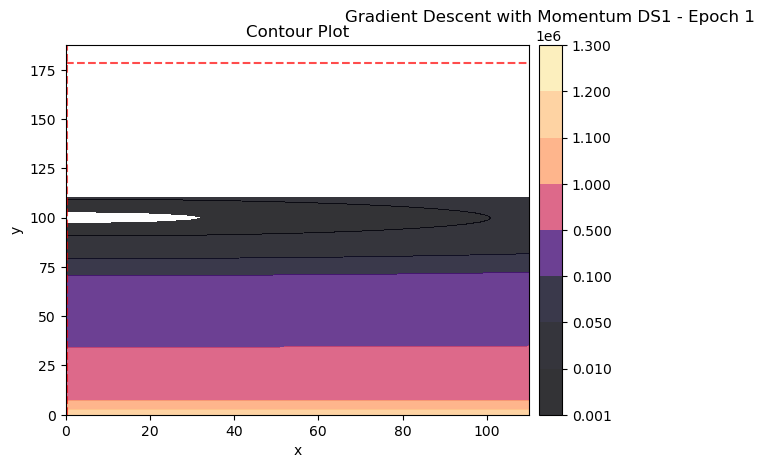

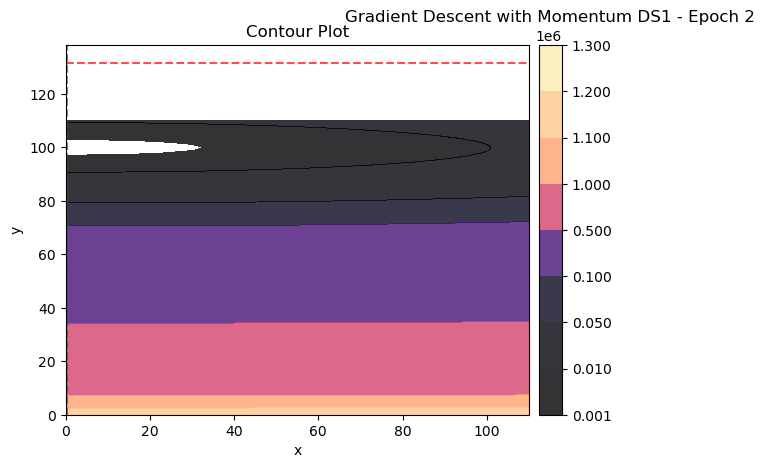

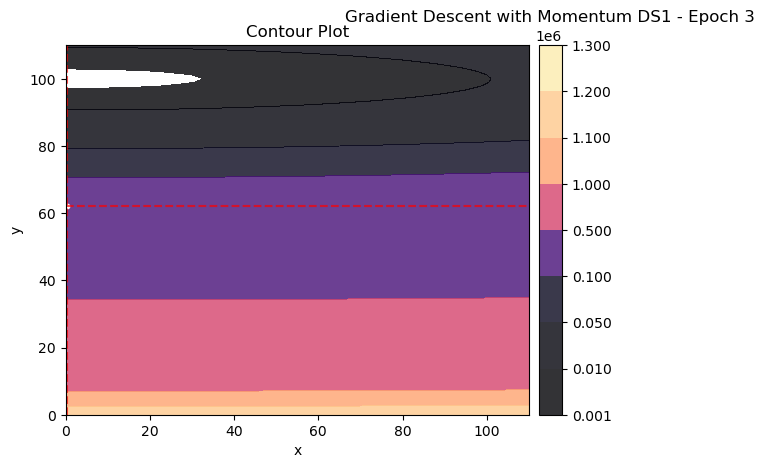

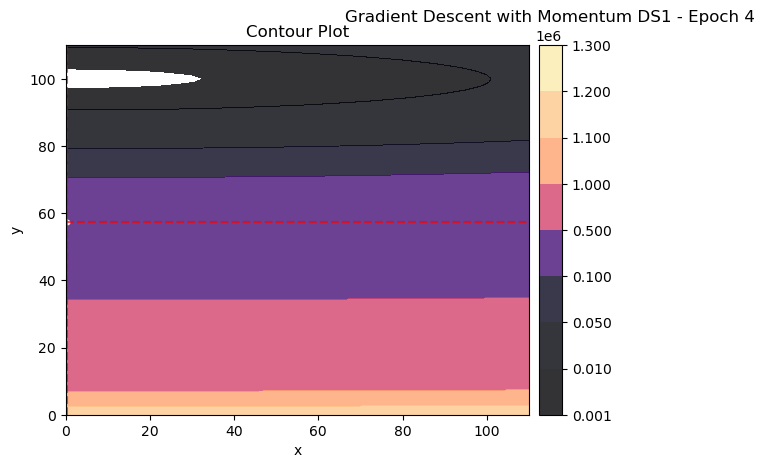

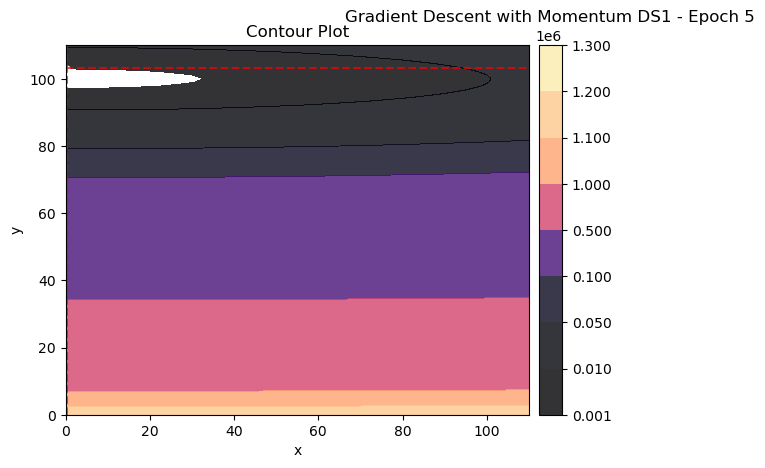

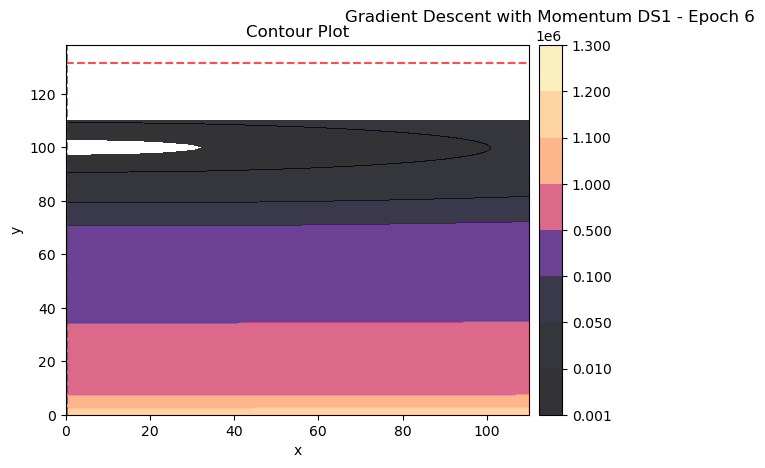

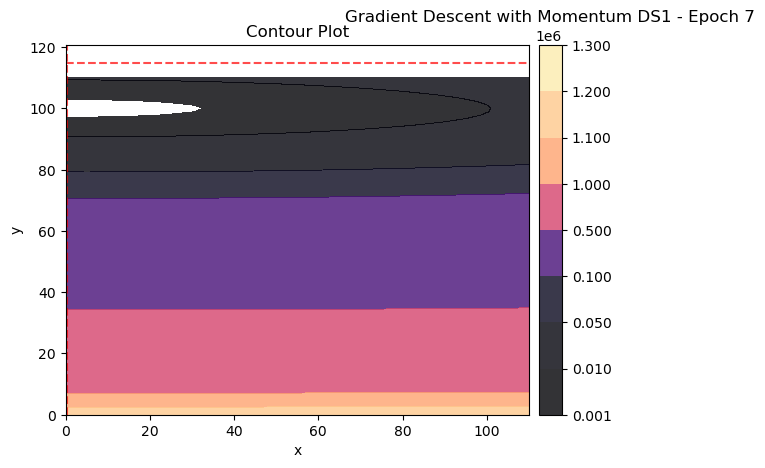

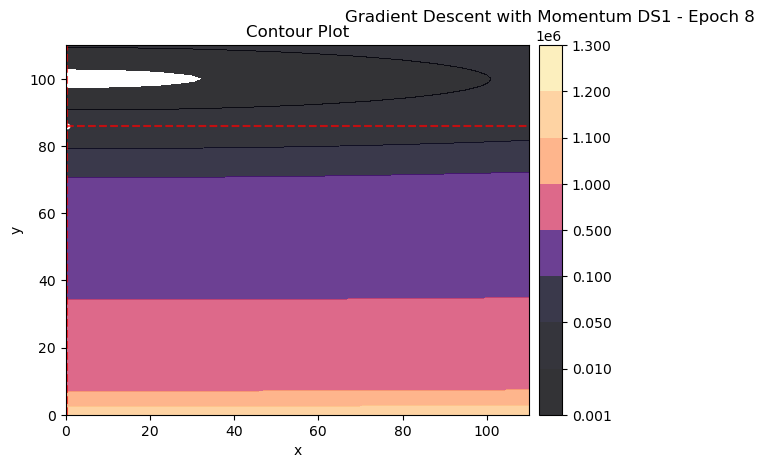

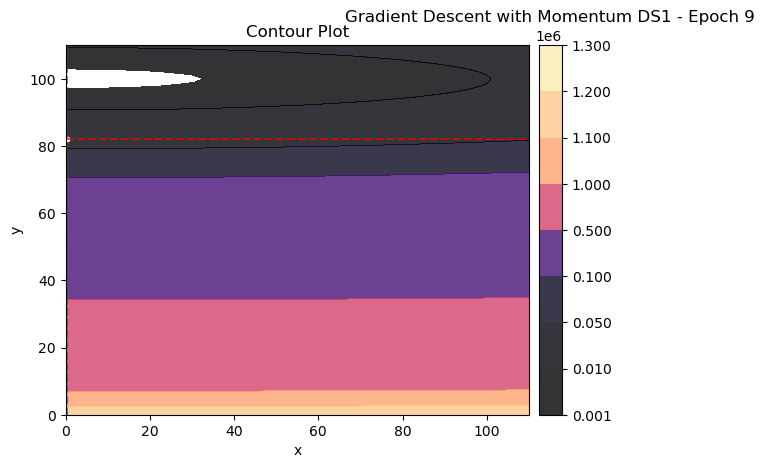

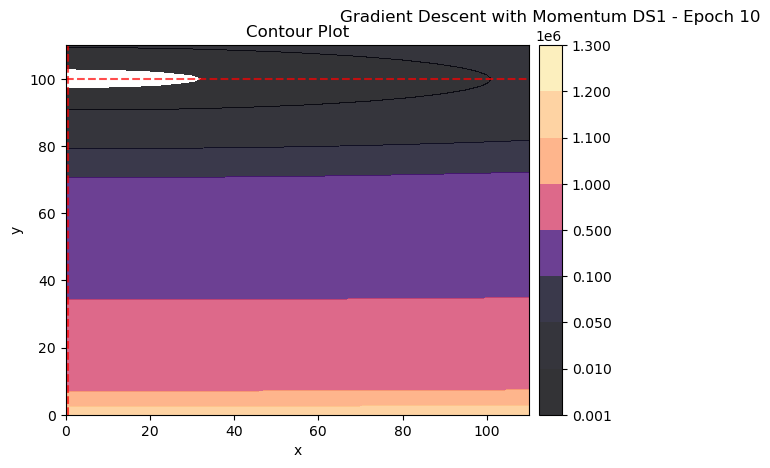

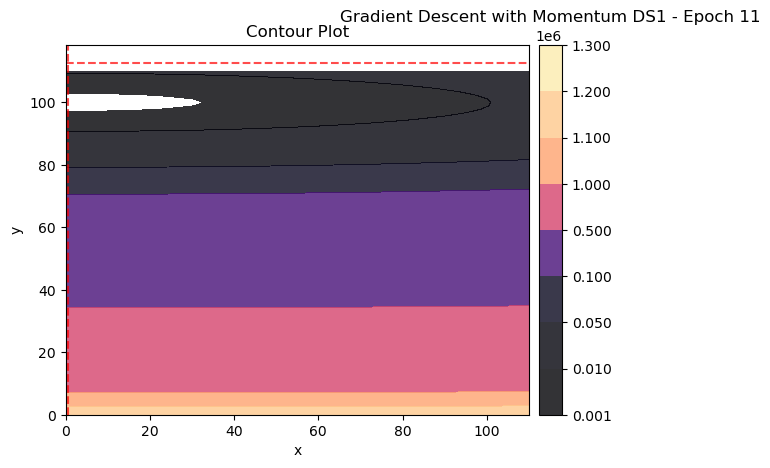

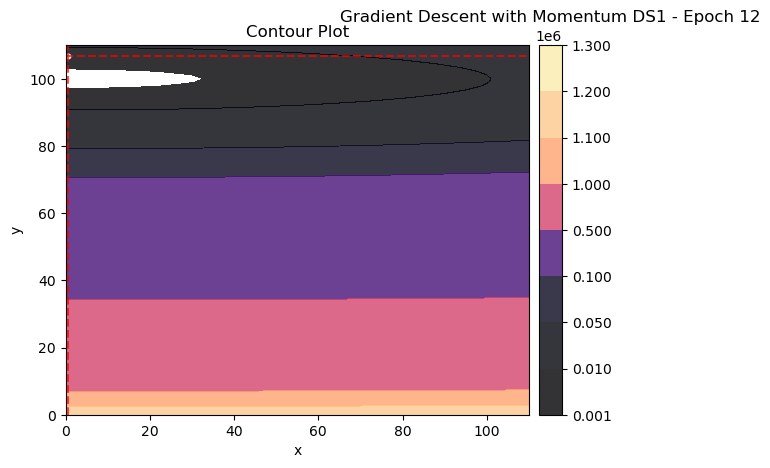

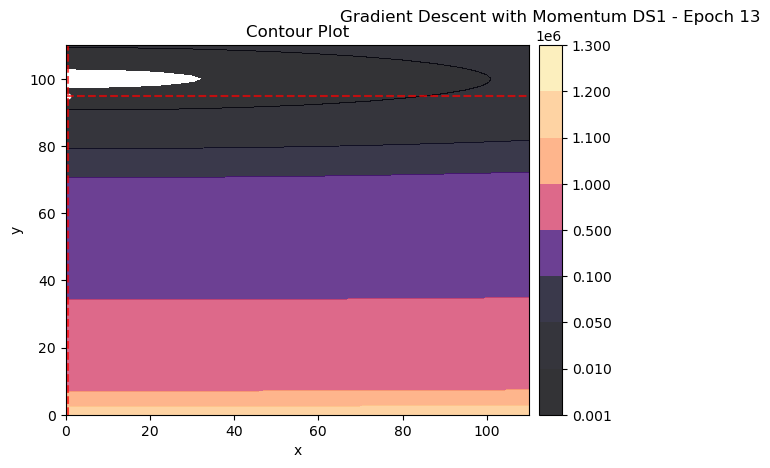

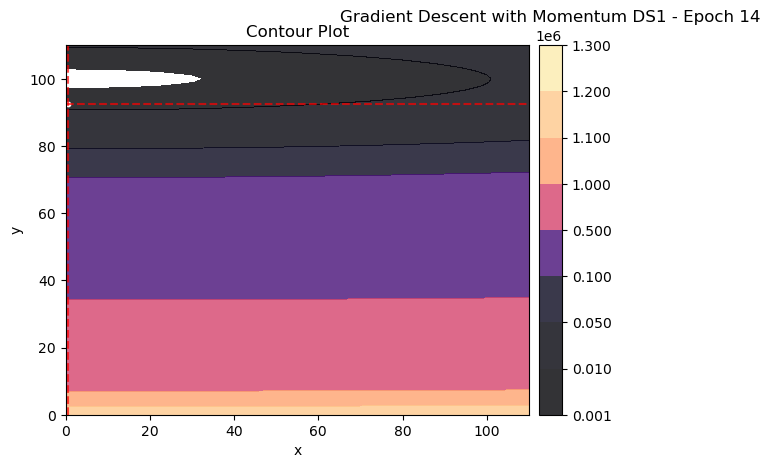

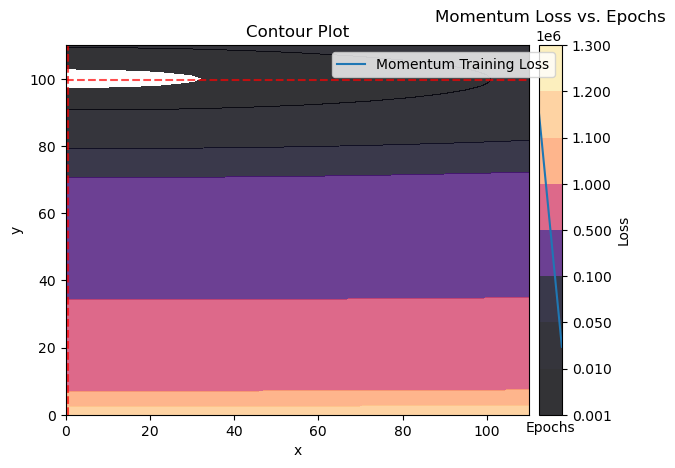

In [9]:
x, y = generate_dataset_1()
X_ = x.reshape(-1, 1)
X__ = np.ones(X_.shape[0])
X__ = X__.reshape(-1, 1)
X = np.hstack((X__, X_))
y = y.reshape(-1, 1)

theta = np.zeros(X.shape[1])



# Set hyperparameters for gradient descent with momentum
learning_rate = 0.01
epsilon = 0.001
MFmomentum_factor = 0.7
#w/o momentum = 72
#1=123,0.2=115,0.3=105,0.4=95,0.5=84,0.6=71,0.7=59,0.8=86,0.9=165
#
# Initialize an empty list to store loss values for plotting
loss_history = []
prev_loss = float('inf')  # Initialize prev_loss to infinity

# Full-batch gradient descent until convergence for gradient descent with momentum
epoch = 0
MTmomentum_term = 0.0

print_interval=20

#latexify(columns=2, fig_width=6.5, fig_height=3)
X1, Y, Z, X_torch, Y_torch = create_XYZ(f, X, y)
print(Z)
levels = [1000, 10000, 50000, 100000, 500000, 1000000, 1100000, 1200000, 1300000]
theta = theta.reshape(-1, 1)

i = 0
while True:
    # Momentum Gradient Descent
    predictions = np.dot(X, theta)
    loss = np.mean((predictions - y) ** 2)
    gradient_theta = np.dot(X.T, (predictions - y)) / len(y)

    # Update momentum term
    MTmomentum_term = MFmomentum_factor * MTmomentum_term + learning_rate * gradient_theta

    # Update theta using momentum for gradient descent with momentum
    theta -= MTmomentum_term

    # Append the current loss to the history list for gradient descent with momentum
    loss_history.append(loss)

    # Print the loss at every iteration for gradient descent with momentum
    if i % print_interval == 0:
        print(f'Momentum Epoch {epoch}, Loss: {loss}')
        print(theta[0], theta[1])


    if epoch <= 15:
        # Contour plot for gradient descent with momentum
        fig, ax = plt.subplots(ncols=1)
        _, _ = create_contour(X1, Y, Z, ax, alpha=0.8, scatter_pts=(theta[0], theta[1]),
                              filled=True, levels=levels)
        ax.axhline(y=theta[1], color='red', linestyle='--', alpha=0.7)
        ax.axvline(x=theta[0], color='red', linestyle='--', alpha=0.7)
        plt.title(f'Gradient Descent with Momentum DS1 - Epoch {epoch}')

    epoch += 1

    # Check for convergence for gradient descent with momentum
    if epoch != 1 and abs(loss - prev_loss) < epsilon:
        print(f'Momentum Converged at epoch {epoch}, Loss: {loss}')
        break
    
    prev_loss = loss

    i = i + 1

# Plotting the Loss vs. Epochs for gradient descent with momentum
plt.plot(range(epoch), loss_history, label='Momentum Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Momentum Loss vs. Epochs')
plt.legend()
plt.show()




tensor([[1.6681e+01, 9.6415e+00, 5.0707e+00,  ..., 1.0830e+04, 1.1063e+04,
         1.1298e+04],
        [1.5932e+01, 8.6831e+00, 3.9032e+00,  ..., 1.0809e+04, 1.1041e+04,
         1.1276e+04],
        [1.5963e+01, 8.5046e+00, 3.5156e+00,  ..., 1.0789e+04, 1.1021e+04,
         1.1255e+04],
        ...,
        [3.5750e+03, 3.5477e+03, 3.5228e+03,  ..., 1.2421e+04, 1.2633e+04,
         1.2848e+04],
        [3.6499e+03, 3.6224e+03, 3.5973e+03,  ..., 1.2476e+04, 1.2687e+04,
         1.2902e+04],
        [3.7256e+03, 3.6979e+03, 3.6726e+03,  ..., 1.2531e+04, 1.2743e+04,
         1.2957e+04]], dtype=torch.float64)
Momentum Epoch 0, Loss: 16.68148600324362
[0.03723527] [0.00512651]
Momentum Epoch 20, Loss: 6.269487462776358
[1.83611188] [0.33563257]
Momentum Epoch 40, Loss: 2.7614236921920168
[2.84903843] [0.70525558]
Momentum Epoch 60, Loss: 1.672526828124979
[3.34604279] [1.04446463]
Momentum Epoch 80, Loss: 1.2266690608720583
[3.59623761] [1.33806721]
Momentum Epoch 100, Loss: 0.993385107

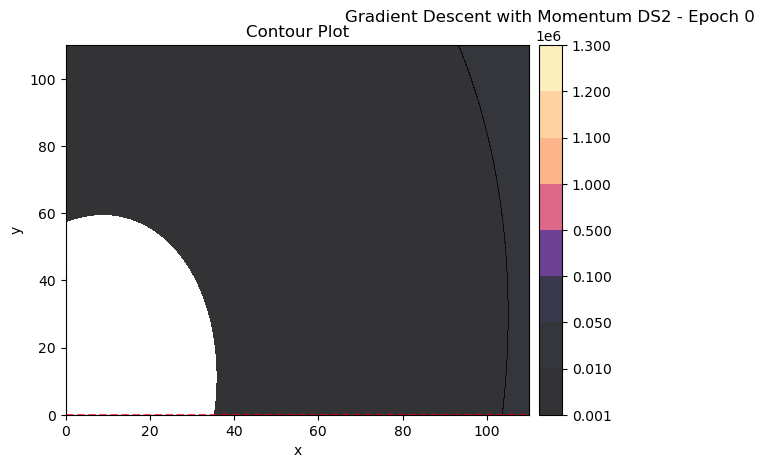

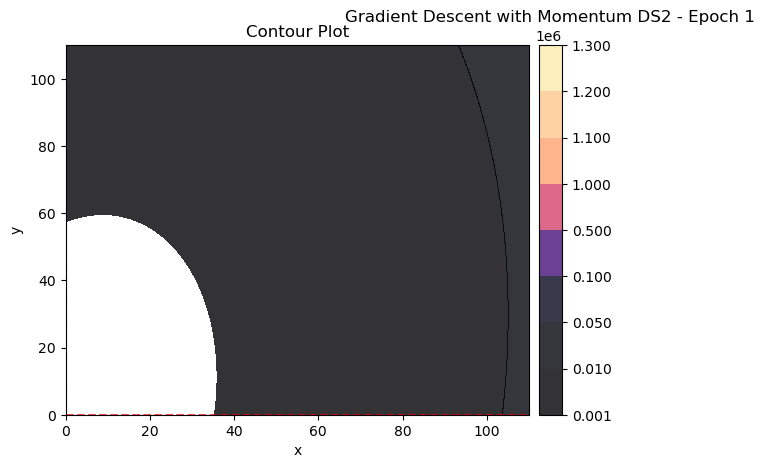

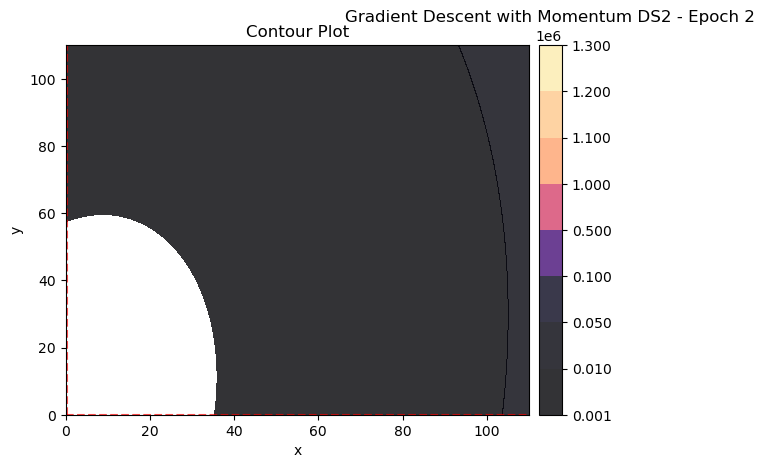

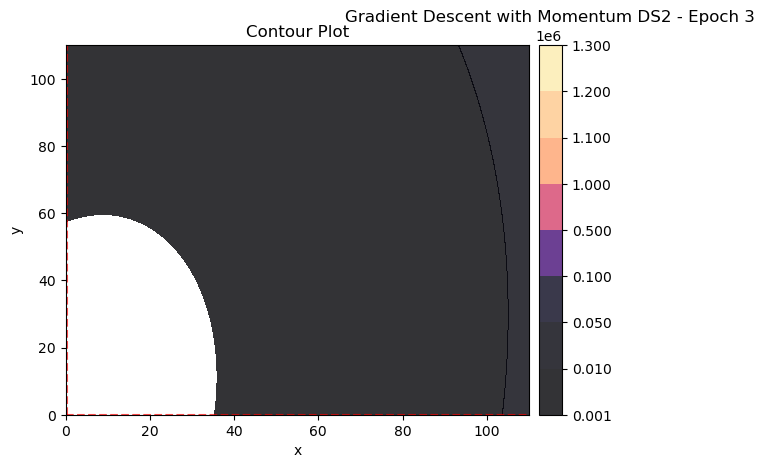

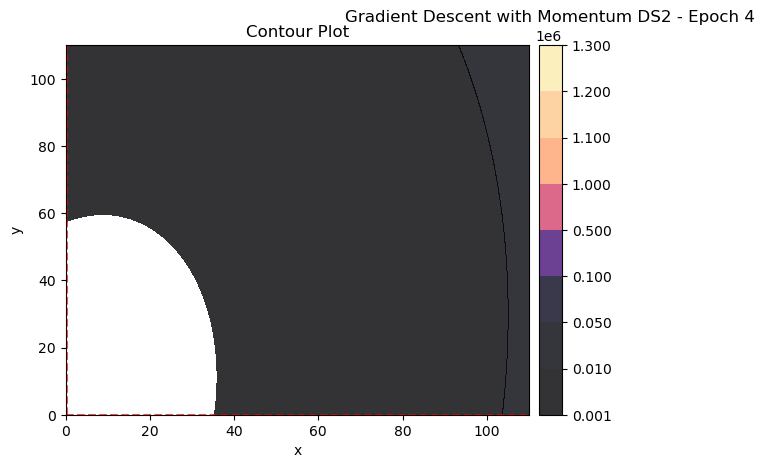

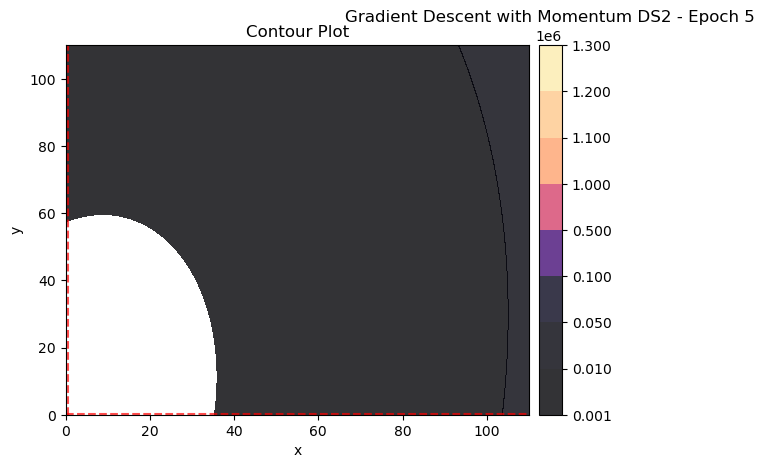

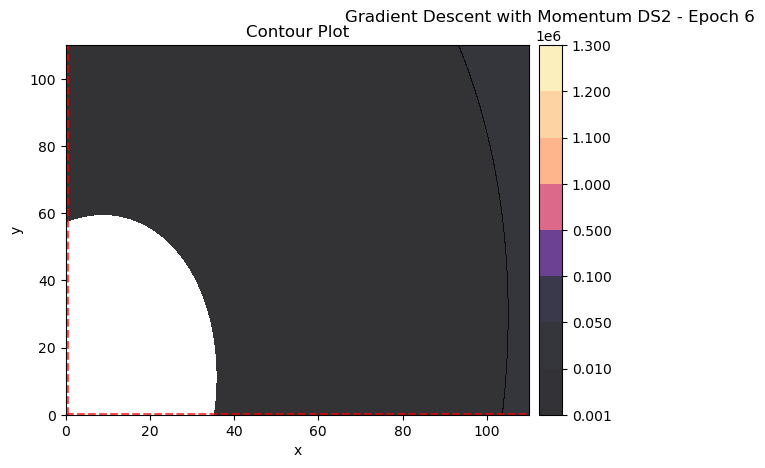

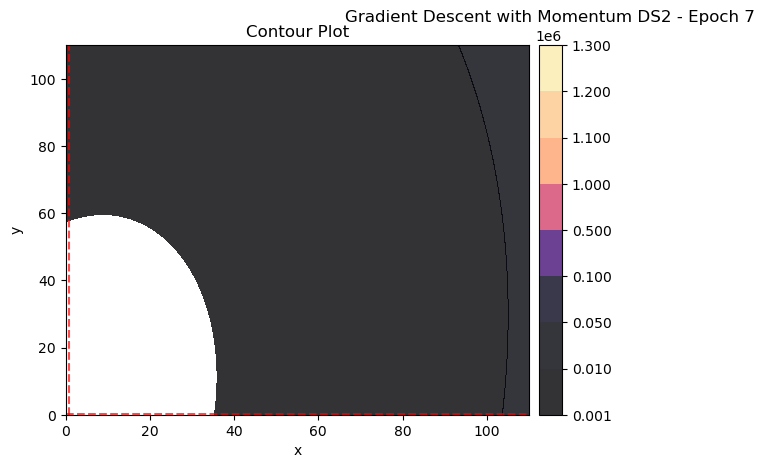

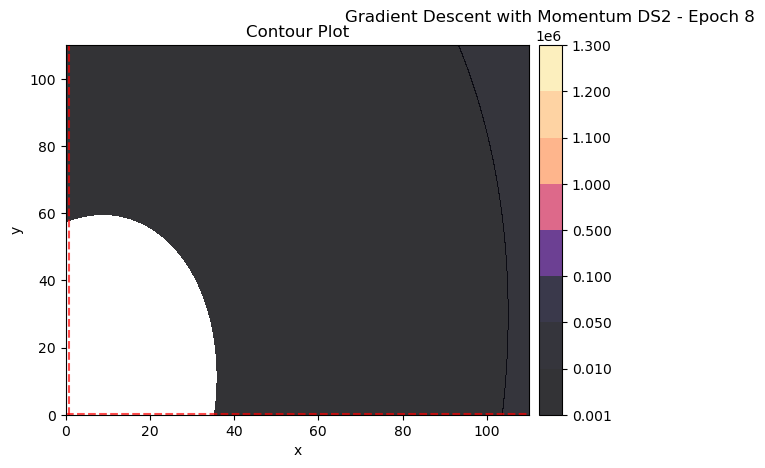

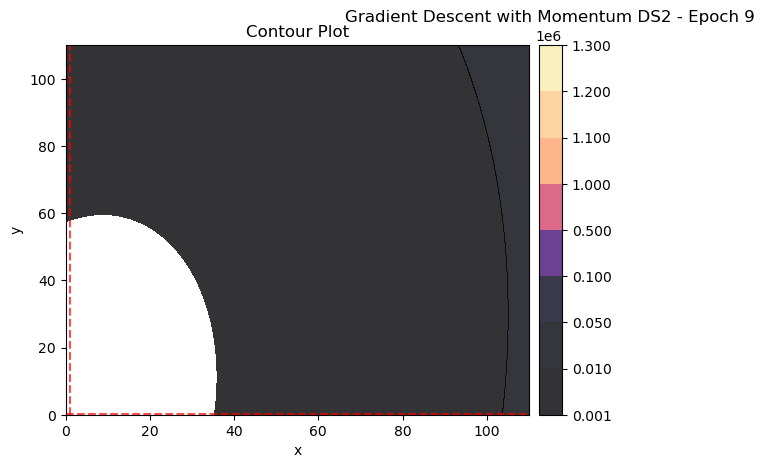

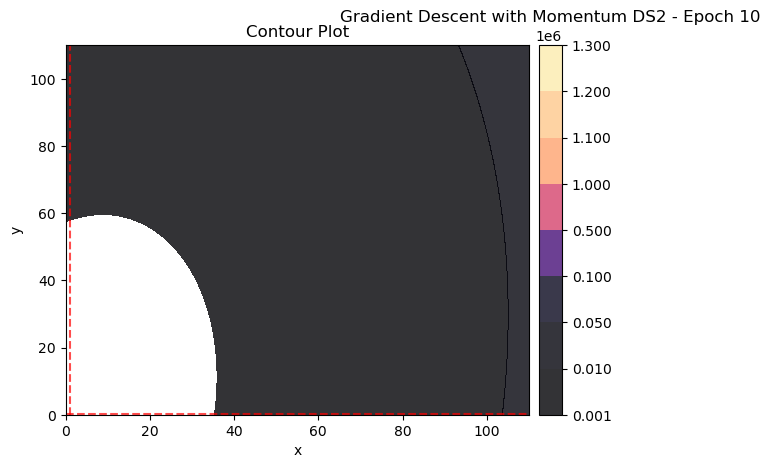

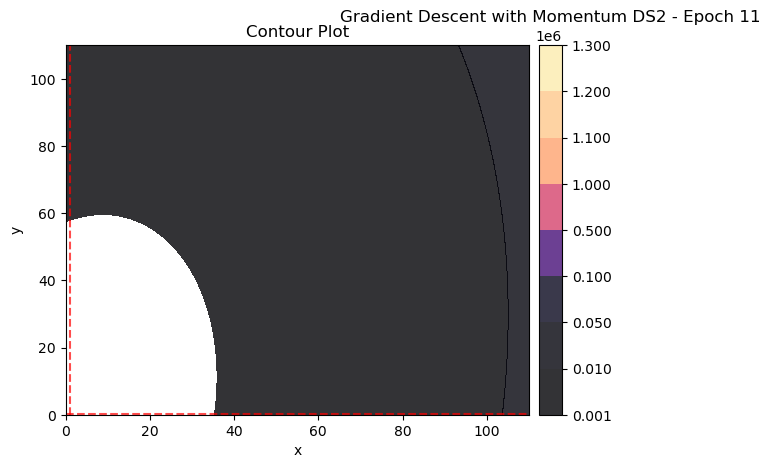

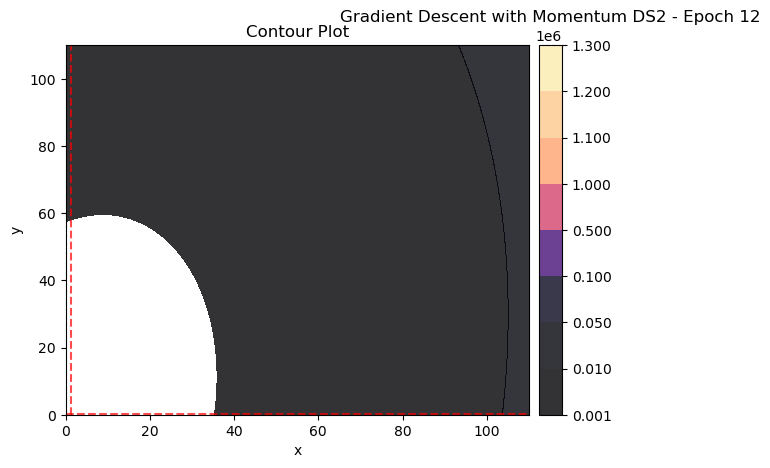

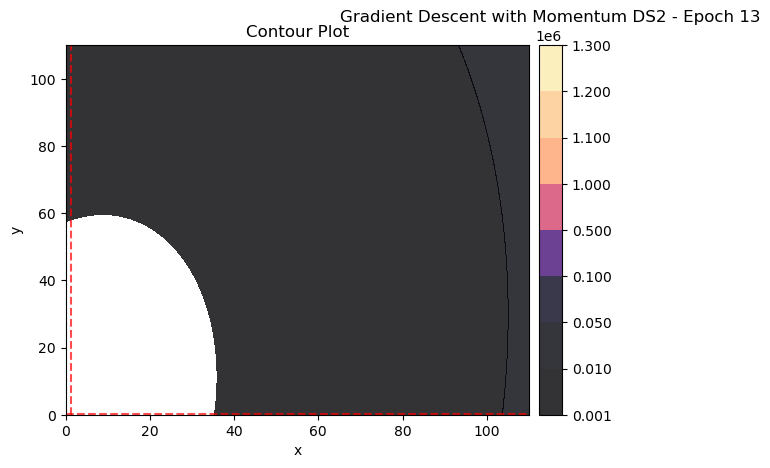

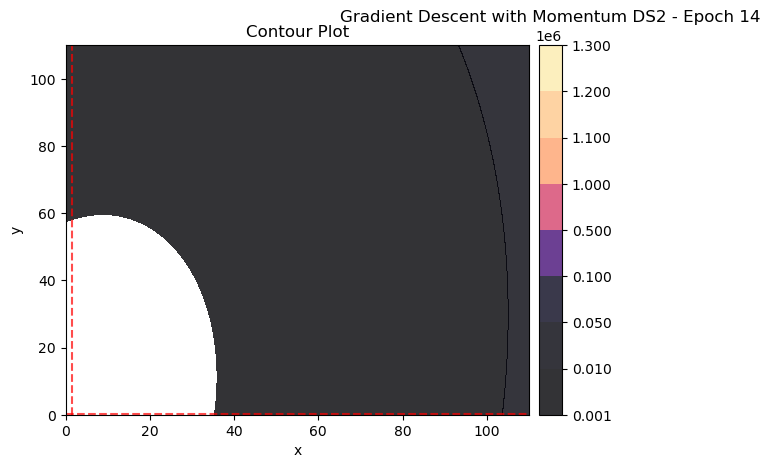

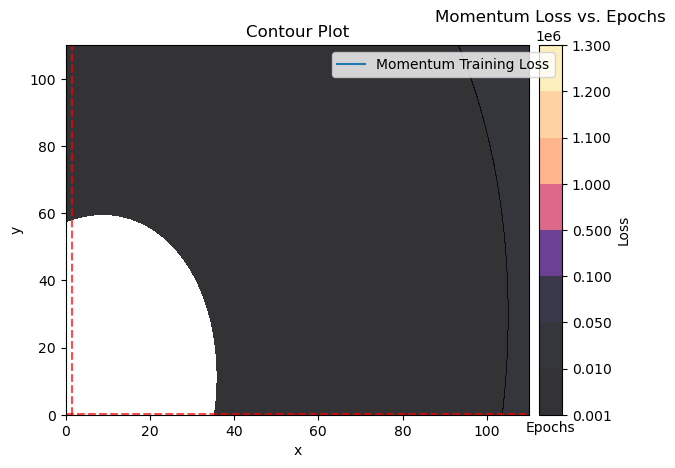

In [10]:
x, y = generate_dataset_2()
X_ = x.reshape(-1, 1)
X__ = np.ones(X_.shape[0])
X__ = X__.reshape(-1, 1)
X = np.hstack((X__, X_))
y = y.reshape(-1, 1)

theta = np.zeros(X.shape[1])

# Set hyperparameters for gradient descent with momentum
learning_rate = 0.01
epsilon = 0.001
MFmomentum_factor = 0.7
#W/o momentum= 375
#0.3=377,0.7=202


# Initialize an empty list to store loss values for plotting
loss_history = []
prev_loss = float('inf')  # Initialize prev_loss to infinity

# Full-batch gradient descent until convergence for gradient descent with momentum
epoch = 0
MTmomentum_term = 0.0

print_interval=20

#latexify(columns=2, fig_width=6.5, fig_height=3)
X1, Y, Z, X_torch, Y_torch = create_XYZ(f, X, y)
print(Z)
levels = [1000, 10000, 50000, 100000, 500000, 1000000, 1100000, 1200000, 1300000]
theta = theta.reshape(-1, 1)

i = 0
while True:
    # Momentum Gradient Descent
    predictions = np.dot(X, theta)
    loss = np.mean((predictions - y) ** 2)
    gradient_theta = np.dot(X.T, (predictions - y)) / len(y)

    # Update momentum term
    MTmomentum_term = MFmomentum_factor * MTmomentum_term + learning_rate * gradient_theta

    # Update theta using momentum for gradient descent with momentum
    theta -= MTmomentum_term

    # Append the current loss to the history list for gradient descent with momentum
    loss_history.append(loss)

    # Print the loss at every iteration for gradient descent with momentum
    if i % print_interval == 0:
        print(f'Momentum Epoch {epoch}, Loss: {loss}')
        print(theta[0], theta[1])


    if epoch <= 15:
        # Contour plot for gradient descent with momentum
        fig, ax = plt.subplots(ncols=1)
        _, _ = create_contour(X1, Y, Z, ax, alpha=0.8, scatter_pts=(theta[0], theta[1]),
                              filled=True, levels=levels)
        ax.axhline(y=theta[1], color='red', linestyle='--', alpha=0.7)
        ax.axvline(x=theta[0], color='red', linestyle='--', alpha=0.7)
        plt.title(f'Gradient Descent with Momentum DS2 - Epoch {epoch}')

    epoch += 1

    # Check for convergence for gradient descent with momentum
    if epoch != 1 and abs(loss - prev_loss) < epsilon:
        print(f'Momentum Converged at epoch {epoch}, Loss: {loss}')
        break
    
    prev_loss = loss

    i = i + 1

# Plotting the Loss vs. Epochs for gradient descent with momentum
plt.plot(range(epoch), loss_history, label='Momentum Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Momentum Loss vs. Epochs')
plt.legend()
plt.show()


tensor([[2.5259e+02, 2.1851e+02, 1.8689e+02, 1.5775e+02, 1.3107e+02, 1.0687e+02,
         8.5128e+01, 6.5859e+01, 4.9060e+01, 3.4729e+01],
        [2.1923e+02, 1.8756e+02, 1.5836e+02, 1.3163e+02, 1.0737e+02, 8.5579e+01,
         6.6256e+01, 4.9402e+01, 3.5018e+01, 2.3102e+01],
        [1.8823e+02, 1.5898e+02, 1.3219e+02, 1.0788e+02, 8.6032e+01, 6.6654e+01,
         4.9746e+01, 3.5307e+01, 2.3337e+01, 1.3837e+01],
        [1.5959e+02, 1.3276e+02, 1.0839e+02, 8.6485e+01, 6.7054e+01, 5.0091e+01,
         3.5598e+01, 2.3574e+01, 1.4019e+01, 6.9331e+00],
        [1.3332e+02, 1.0890e+02, 8.6940e+01, 6.7454e+01, 5.0438e+01, 3.5890e+01,
         2.3812e+01, 1.4202e+01, 7.0623e+00, 2.3913e+00],
        [1.0941e+02, 8.7396e+01, 6.7856e+01, 5.0785e+01, 3.6183e+01, 2.4051e+01,
         1.4387e+01, 7.1927e+00, 2.4674e+00, 2.1132e-01],
        [8.7853e+01, 6.8259e+01, 5.1134e+01, 3.6478e+01, 2.4291e+01, 1.4573e+01,
         7.3243e+00, 2.5447e+00, 2.3437e-01, 3.9312e-01],
        [6.8663e+01, 5.1484

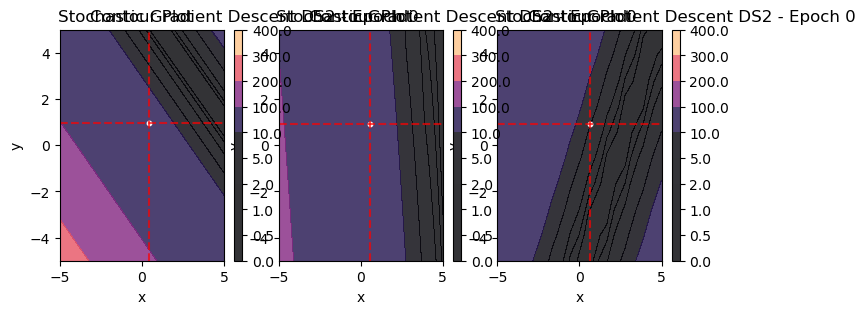

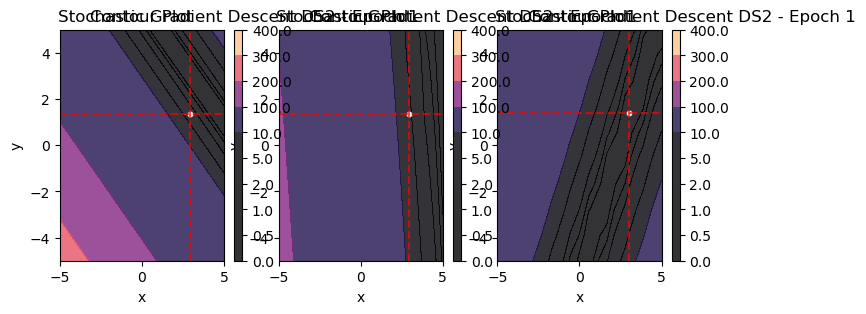

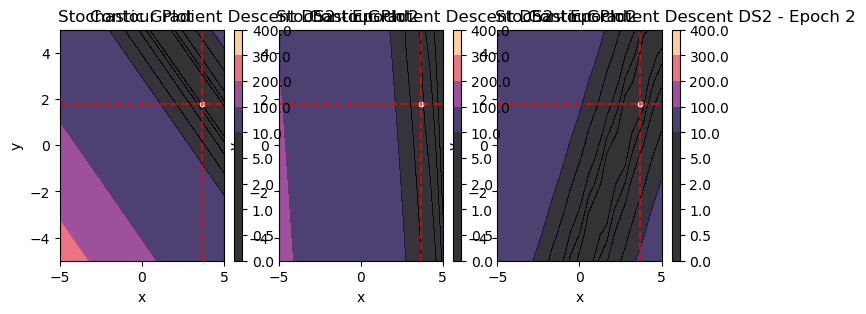

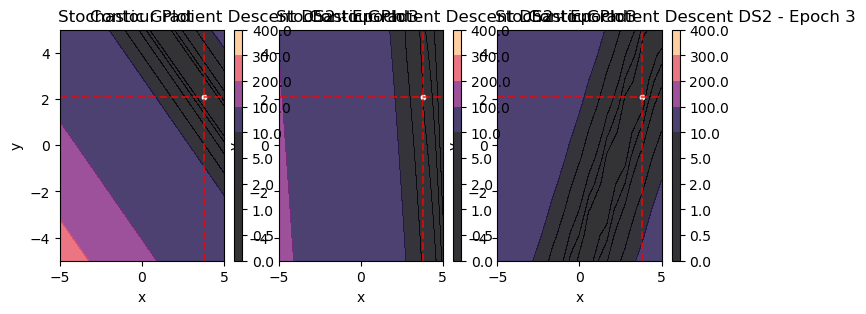

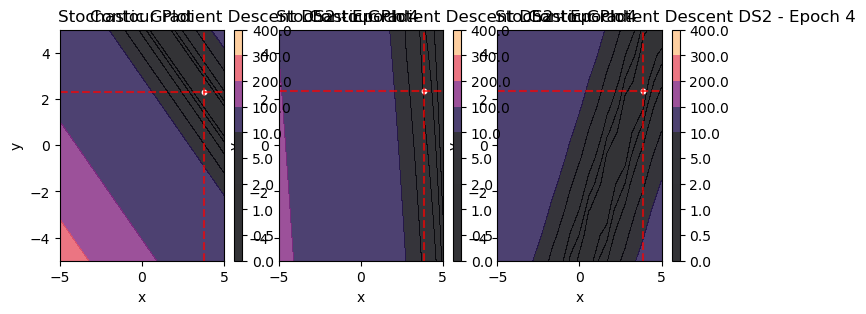

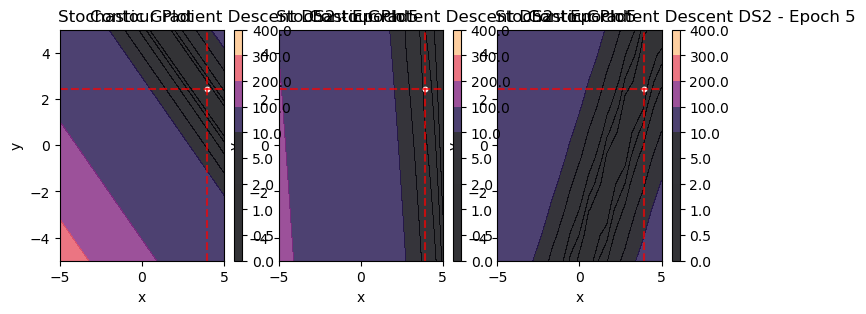

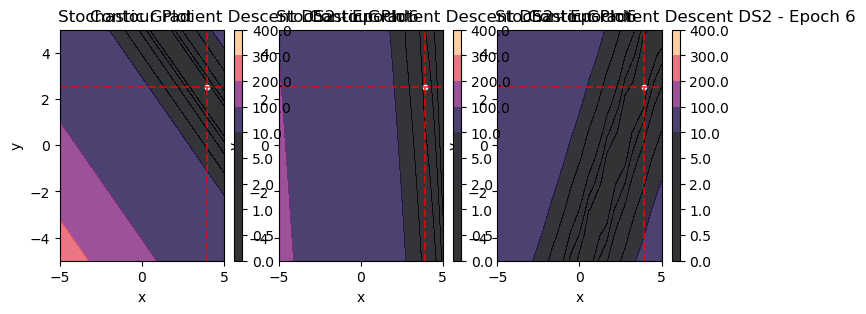

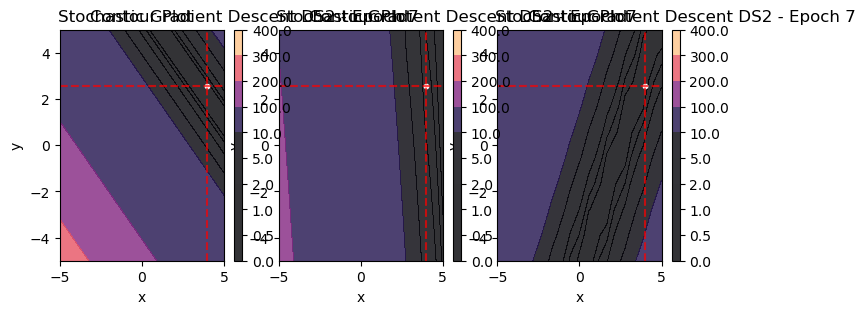

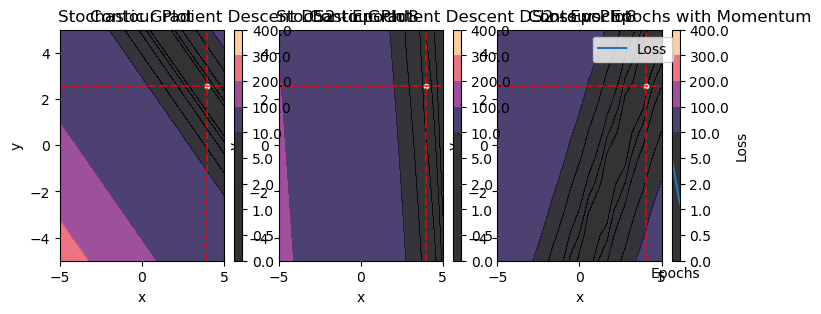

In [11]:
# Generate the dataset
x, y = generate_dataset_2()
X_ = x.reshape(-1, 1)
X__ = np.ones(X_.shape[0])
X__ = X__.reshape(-1, 1)
X = np.hstack((X__, X_))
y = y.reshape(-1, 1)

# Initialize weights randomly
np.random.seed(42)
theta = np.random.rand(X.shape[1])
theta = theta.reshape(-1, 1)

# Set learning rate, epsilon, and momentum factor
learning_rate = 0.01
epsilon = 0.001
momentum_factor = 0.4
#w/o momentum= 12
#0.9=21,0.1=12,0.2=16,0.3=16,0.4=9

# Lists to store loss and iteration count
losses = []
iterations = []

# Placeholder for previous weights to check convergence
prev_loss = float('inf')

# Start the iteration
iteration = 0
X1, Y1, Z1, X_torch, Y_torch = create_XYZ3(f1, X[0], y[0])
X2, Y2, Z2, X_torch, Y_torch = create_XYZ3(f2, X[1], y[1])
X3, Y3, Z3, X_torch, Y_torch = create_XYZ3(f3, X[2], y[2])
print(Z1)
levels = [0, 0.5, 1, 2, 5, 10, 100, 200, 300, 400]
momentum = np.zeros_like(theta)

while True:
    # Randomly shuffle the dataset for stochasticity
    indices = np.random.permutation(X.shape[0])
    X_shuffled = X[indices]
    y_shuffled = y[indices]

    # Initialize loss for this iteration
    current_loss = 0

    fig, ax = plt.subplots(ncols=3, figsize=(8, 3))

    # Iterate through each data point
    for i in range(X.shape[0]):
        # Compute the gradient for the current data point
        gradient = 2 * (X_shuffled[i].reshape(1, -1) @ theta - y_shuffled[i].reshape(-1, 1)) @ X_shuffled[i].reshape(1, -1)

        # Update momentum
        momentum = momentum_factor * momentum + learning_rate * gradient.T

        # Update weights using momentum
        theta -= momentum

        # Update loss for this data point
        current_loss += (X_shuffled[i] @ theta - y_shuffled[i]) ** 2

        if iteration < 15:
            if i < 3:
                if i == 0:
                    _, _ = create_contour(X1, Y1, Z1, ax[i], alpha=0.8, scatter_pts=(theta[0], theta[1]),
                                           filled=True, levels=levels)
                    ax[i].axhline(y=theta[1], color='red', linestyle='--', alpha=0.7)
                    ax[i].axvline(x=theta[0], color='red', linestyle='--', alpha=0.7)
                    plt.title(f'Stochastic Gradient Descent DS2 - Epoch {iteration}')
                elif i == 1:
                    _, _ = create_contour(X2, Y2, Z2, ax[i], alpha=0.8, scatter_pts=(theta[0], theta[1]),
                                           filled=True, levels=levels)
                    ax[i].axhline(y=theta[1], color='red', linestyle='--', alpha=0.7)
                    ax[i].axvline(x=theta[0], color='red', linestyle='--', alpha=0.7)
                    plt.title(f'Stochastic Gradient Descent DS2 - Epoch {iteration}')
                else:
                    _, _ = create_contour(X3, Y3, Z3, ax[i], alpha=0.8, scatter_pts=(theta[0], theta[1]),
                                           filled=True, levels=levels)
                    ax[i].axhline(y=theta[1], color='red', linestyle='--', alpha=0.7)
                    ax[i].axvline(x=theta[0], color='red', linestyle='--', alpha=0.7)
                    plt.title(f'Stochastic Gradient Descent DS2 - Epoch {iteration}')

    # Calculate average loss for this iteration
    current_loss /= X.shape[0]

    # Append loss and iteration count to the lists
    losses.append(current_loss)
    iterations.append(iteration)

    # Check for convergence
    if iteration != 0:
        if iteration > 0 and abs(current_loss - prev_loss) < epsilon:
            print(f"Converged at iteration {iteration + 1}")
            break

    # Update previous loss for the next iteration
    prev_loss = current_loss
    iteration += 1

# Print the final weights
print("Final Weights:", theta)

# Plot Loss vs. Epochs
plt.plot(iterations, losses, label='Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs. Epochs with Momentum')
plt.legend()
plt.show()


tensor([[145648.8480, 146498.1707, 147349.9626, 148204.2236, 149060.9538,
         149920.1531, 150781.8215, 151645.9591, 152512.5658, 153381.6416],
        [142534.0993, 143374.3047, 144216.9793, 145062.1230, 145909.7358,
         146759.8178, 147612.3689, 148467.3891, 149324.8785, 150184.8370],
        [139453.0165, 140284.1046, 141117.6618, 141953.6882, 142792.1837,
         143633.1483, 144476.5821, 145322.4850, 146170.8571, 147021.6982],
        [136405.5997, 137227.5704, 138052.0103, 138878.9194, 139708.2975,
         140540.1448, 141374.4613, 142211.2469, 143050.5016, 143892.2254],
        [133391.8487, 134204.7022, 135020.0247, 135837.8164, 136658.0773,
         137480.8073, 138306.0064, 139133.6746, 139963.8120, 140796.4185],
        [130411.7637, 131215.4998, 132021.7051, 132830.3794, 133641.5229,
         134455.1356, 135271.2174, 136089.7683, 136910.7883, 137734.2775],
        [127465.3446, 128259.9634, 129057.0513, 129856.6083, 130658.6345,
         131463.1298, 132270.094

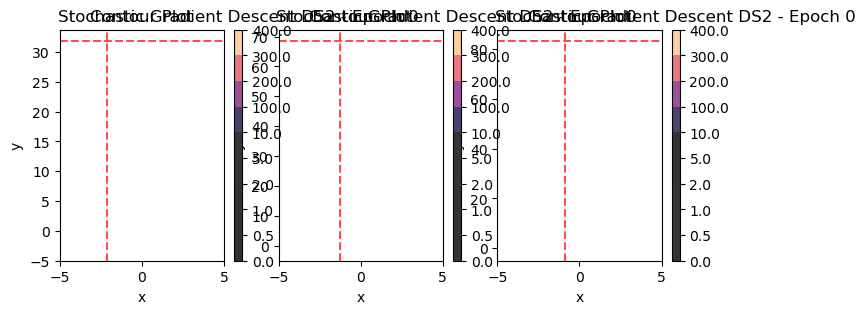

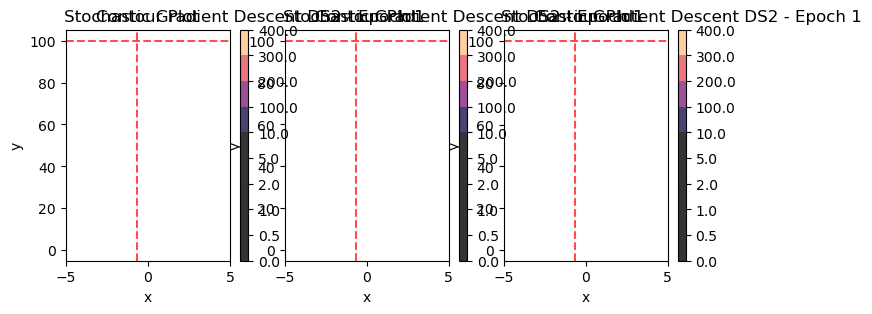

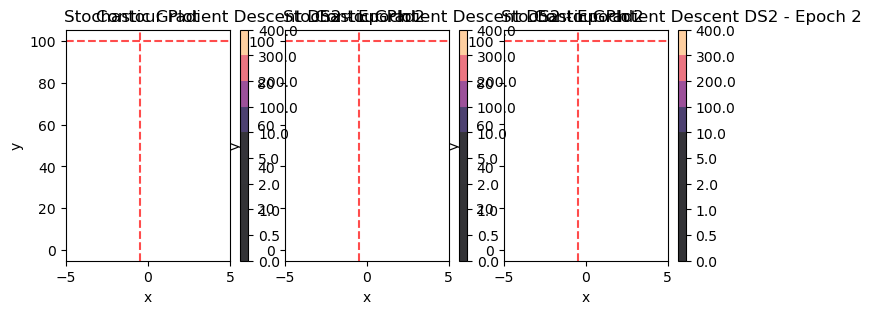

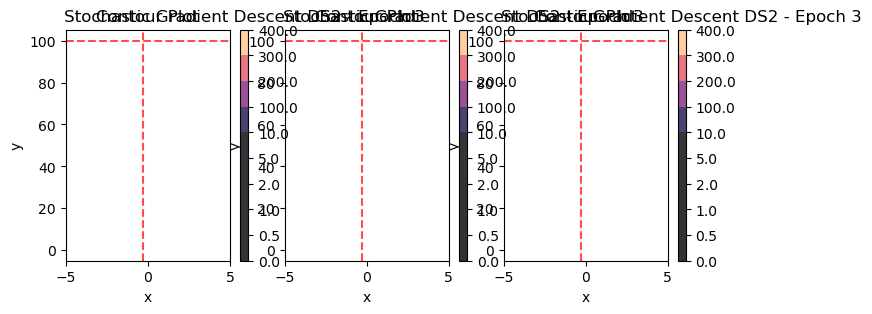

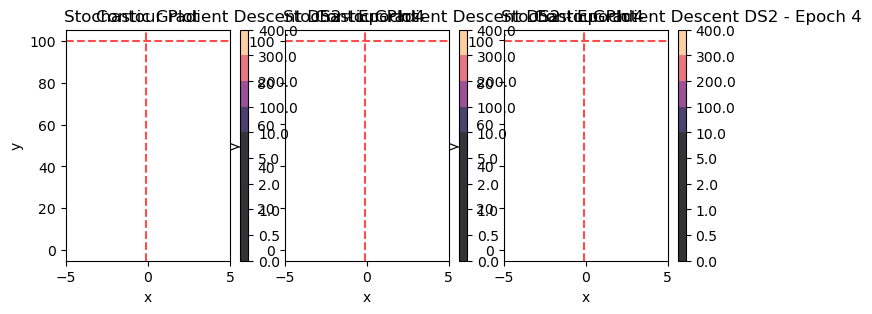

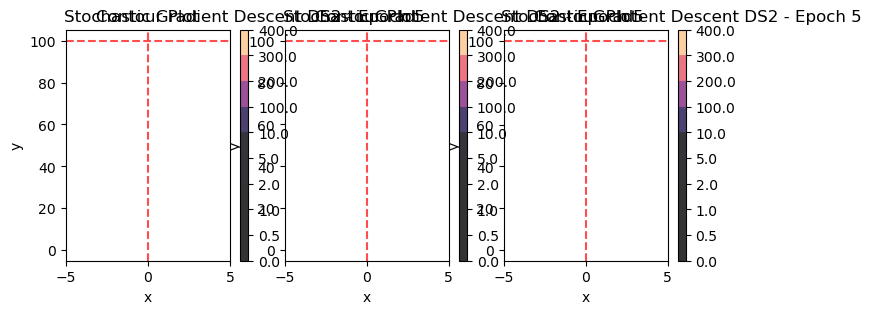

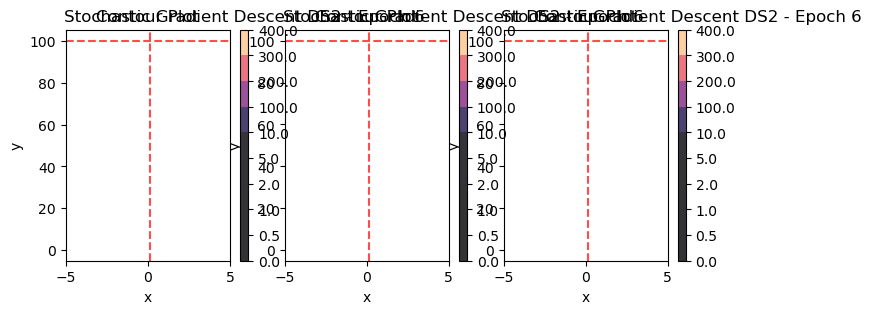

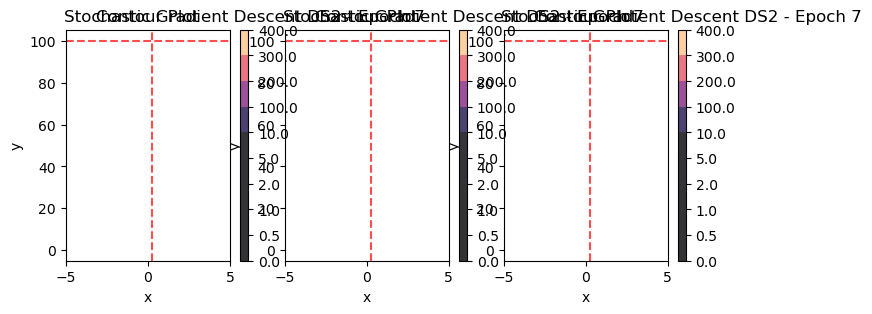

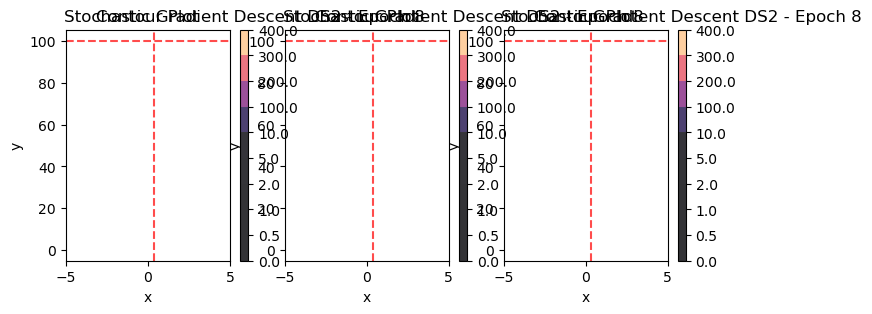

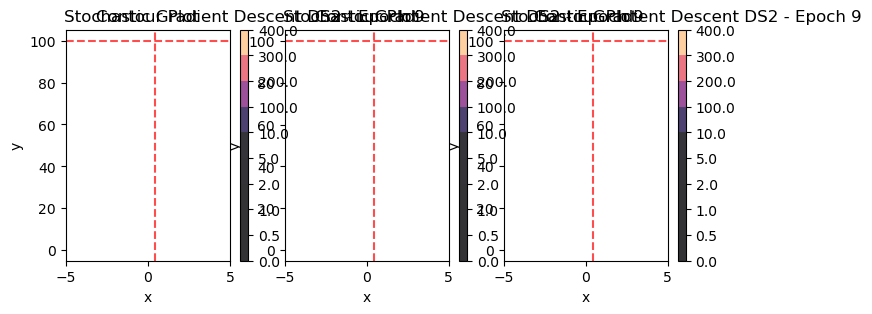

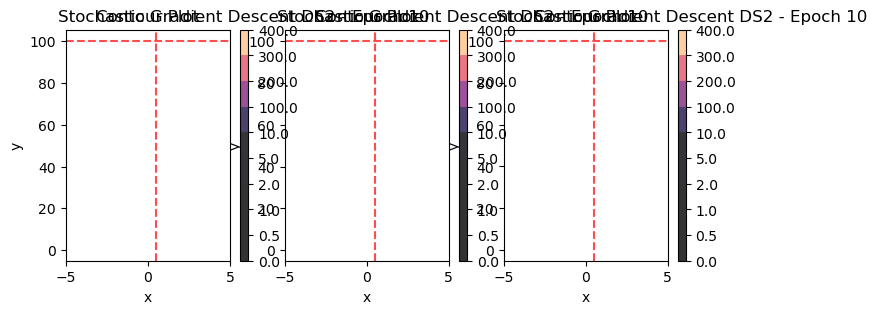

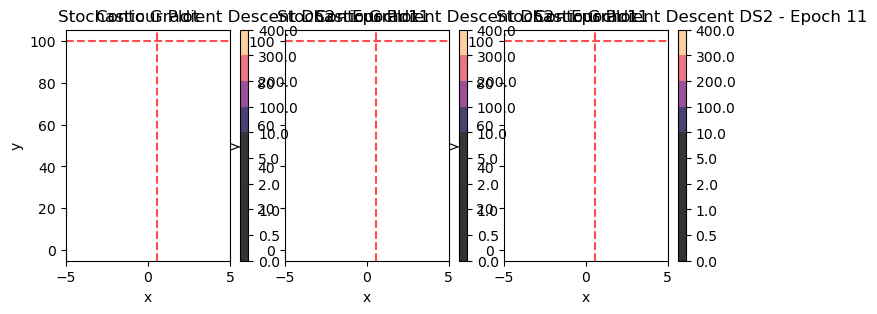

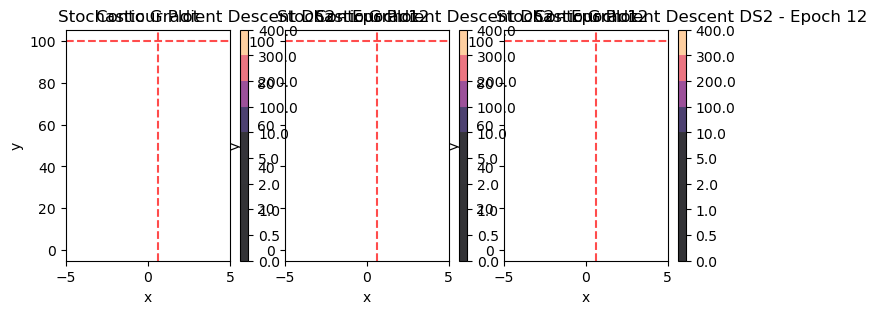

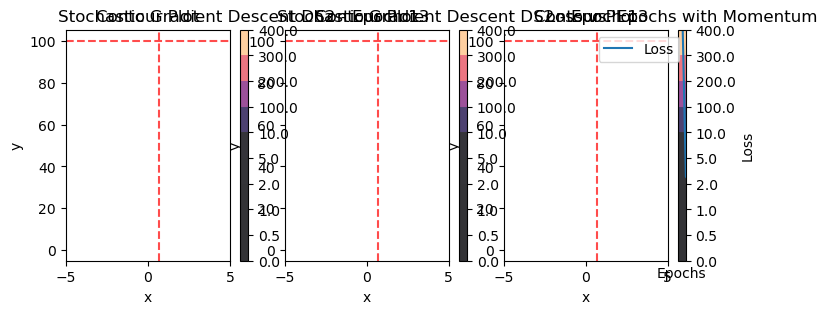

In [12]:
# Generate the dataset
x, y = generate_dataset_1()
X_ = x.reshape(-1, 1)
X__ = np.ones(X_.shape[0])
X__ = X__.reshape(-1, 1)
X = np.hstack((X__, X_))
y = y.reshape(-1, 1)

# Initialize weights randomly
np.random.seed(42)
theta = np.random.rand(X.shape[1])
theta = theta.reshape(-1, 1)

# Set learning rate, epsilon, and momentum factor
learning_rate = 0.001
epsilon = 0.001
momentum_factor = 0.4
#w/o momentum= 261
#0.9=21,0.1=12,0.2=16,0.3=16,0.4=9

# Lists to store loss and iteration count
losses = []
iterations = []

# Placeholder for previous weights to check convergence
prev_loss = float('inf')

# Start the iteration
iteration = 0
X1, Y1, Z1, X_torch, Y_torch = create_XYZ3(f1, X[0], y[0])
X2, Y2, Z2, X_torch, Y_torch = create_XYZ3(f2, X[1], y[1])
X3, Y3, Z3, X_torch, Y_torch = create_XYZ3(f3, X[2], y[2])
print(Z1)
levels = [0, 0.5, 1, 2, 5, 10, 100, 200, 300, 400]
momentum = np.zeros_like(theta)

while True:
    # Randomly shuffle the dataset for stochasticity
    indices = np.random.permutation(X.shape[0])
    X_shuffled = X[indices]
    y_shuffled = y[indices]

    # Initialize loss for this iteration
    current_loss = 0

    fig, ax = plt.subplots(ncols=3, figsize=(8, 3))

    # Iterate through each data point
    for i in range(X.shape[0]):
        # Compute the gradient for the current data point
        gradient = 2 * (X_shuffled[i].reshape(1, -1) @ theta - y_shuffled[i].reshape(-1, 1)) @ X_shuffled[i].reshape(1, -1)

        # Update momentum
        momentum = momentum_factor * momentum + learning_rate * gradient.T

        # Update weights using momentum
        theta -= momentum

        # Update loss for this data point
        current_loss += (X_shuffled[i] @ theta - y_shuffled[i]) ** 2

        if iteration < 15:
            if i < 3:
                if i == 0:
                    _, _ = create_contour(X1, Y1, Z1, ax[i], alpha=0.8, scatter_pts=(theta[0], theta[1]),
                                           filled=True, levels=levels)
                    ax[i].axhline(y=theta[1], color='red', linestyle='--', alpha=0.7)
                    ax[i].axvline(x=theta[0], color='red', linestyle='--', alpha=0.7)
                    plt.title(f'Stochastic Gradient Descent DS2 - Epoch {iteration}')
                elif i == 1:
                    _, _ = create_contour(X2, Y2, Z2, ax[i], alpha=0.8, scatter_pts=(theta[0], theta[1]),
                                           filled=True, levels=levels)
                    ax[i].axhline(y=theta[1], color='red', linestyle='--', alpha=0.7)
                    ax[i].axvline(x=theta[0], color='red', linestyle='--', alpha=0.7)
                    plt.title(f'Stochastic Gradient Descent DS2 - Epoch {iteration}')
                else:
                    _, _ = create_contour(X3, Y3, Z3, ax[i], alpha=0.8, scatter_pts=(theta[0], theta[1]),
                                           filled=True, levels=levels)
                    ax[i].axhline(y=theta[1], color='red', linestyle='--', alpha=0.7)
                    ax[i].axvline(x=theta[0], color='red', linestyle='--', alpha=0.7)
                    plt.title(f'Stochastic Gradient Descent DS2 - Epoch {iteration}')

    # Calculate average loss for this iteration
    current_loss /= X.shape[0]

    # Append loss and iteration count to the lists
    losses.append(current_loss)
    iterations.append(iteration)

    # Check for convergence
    if iteration != 0:
        if iteration > 0 and abs(current_loss - prev_loss) < epsilon:
            print(f"Converged at iteration {iteration + 1}")
            break

    # Update previous loss for the next iteration
    prev_loss = current_loss
    iteration += 1

# Print the final weights
print("Final Weights:", theta)

# Plot Loss vs. Epochs
plt.plot(iterations, losses, label='Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs. Epochs with Momentum')
plt.legend()
plt.show()


## No. of Epochs

| Dataset | Momentum | Vanilla GD | Stochastic GD |
|---------|----------|-------------|---------------|
| DS 1    |          | 132         | 261           |
| DS 1    | M        | 59          | 14            |
| DS 2    |          | 481         | 10            |
| DS 2    | M        | 202         | 09            |


The convergence analysis reveals intriguing insights into the impact of momentum in stochastic gradient descent (SGD) and vanilla gradient descent across two distinct datasets. In the context of SGD, when aiming to reach the e_neighborhood (e=0.001), dataset 1 demonstrates a convergence of 261 epochs without momentum, significantly reducing to 14 epochs when momentum is incorporated. Similarly, for dataset 2, the convergence decreases from 10 epochs without momentum to 9 epochs with momentum.

Similiarly, vanilla gradient descent exhibits distinct behavior. For dataset 1, the convergence is observed in 132 epochs without momentum and accelerates to 59 epochs with momentum. On the other hand, for dataset 2, the convergence decreases from 481 epochs without momentum to 202 epochs with momentum.

The observed reduction in epochs with momentum suggests that the introduction of momentum accelerates convergence in both SGD and vanilla gradient descent. Momentum helps mitigate oscillations and enhances the algorithms' ability to navigate complex loss landscapes, leading to quicker convergence. The disparity in the magnitude of reduction across datasets indicates that the impact of momentum is influenced by the inherent characteristics of the data.

In conclusion, the utilization of momentum in optimization algorithms, particularly evident in the substantial reduction of epochs for convergence, underscores its efficacy in facilitating quicker and more efficient convergence. However, the varying degrees of improvement across datasets emphasize the importance of considering dataset-specific characteristics when determining the appropriateness of momentum in the optimization process.